# Plot timeseries data

In [1]:
import numpy as np
import pandas as pd
import windpype as wp
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
file_path = "../../data/"
# Power and consumption, 1 hour resolution
power_cons_ob = wp.CombPowerData(file_path=file_path,file_name='DK1_DK2_power_cons_1hour')
# Decide on renewable share cuts
alpha_cuts = [20,80]
# Decide on duration cuts and convert to frequencies, including 0 Hz
duration_cuts = np.array([[0.5,10],[10,24],[24,7*24],[7*24,3*30*24],[3*30*24,365*24],[365*24,1e6]]) # hours
freq_cuts = np.sort(1/duration_cuts/(60*60)) # Hz
freq_cuts[freq_cuts == np.min(freq_cuts)] = 0
N_freqs = len(freq_cuts)
labels = ['< 10 hrs',\
          '10 - 24 hrs',\
          '24 hrs - 1 week',\
          '1 week - 3 months',\
          '3 months - 1 yr',\
          '> 1 yr']
trl = 'TotalResLoad'
trp = 'TotalRenPower'
colors = cm.rainbow(np.linspace(0, 1, len(freq_cuts)))
ext = ''
power_cons_ob.data_df.keys()

windpype submodule "power" imported
windpype submodule "aux" imported
windpype submodule "capacity" imported
windpype module import complete
No method set for combining, will look for passed dataframe
No dataframe given, will look for saved file
Restored dataframe


Index(['datetime', 'OffshoreWindPower_DK1', 'OffshoreWindPower_DK2',
       'OffshoreWindPower', 'OnshoreWindPower_DK1', 'OnshoreWindPower_DK2',
       'OnshoreWindPower', 'SolarPower_DK1', 'SolarPower_DK2', 'SolarPower',
       'TotalWindPower', 'TotalWindPower_DK1', 'TotalWindPower_DK2',
       'TotalOnshoreWindPower', 'TotalOffshoreWindPower', 'TotalRenPower',
       'TotalRenPower_DK1', 'TotalRenPower_DK2', 'GrossCon', 'GrossCon_DK1',
       'GrossCon_DK2', 'delta_time', 'time_steps', 'TotalResLoad',
       'TotalResLoad_DK1', 'TotalResLoad_DK2'],
      dtype='object')

In [2]:
# Calculate hourly share of VRE
power_cons_ob.AddHighPenetrationIndex(alpha_cuts=alpha_cuts,power_name=trp+ext)

Using load: GrossCon
Calculating penetration fraction for every time step
------
Penetration fraction is above 80% 13.67% of the time
With 5991 data points
Out of 67925 data points
Min and maximum epoch durations of high penetration: 1.000000 and 100.000000 hrs
Penetration fraction is below 20% 29.25% of the time
With 12818 data points
Out of 67925 data points
Min and maximum epoch durations of low penetration: 1.000000 and 143.000000 hrs
------


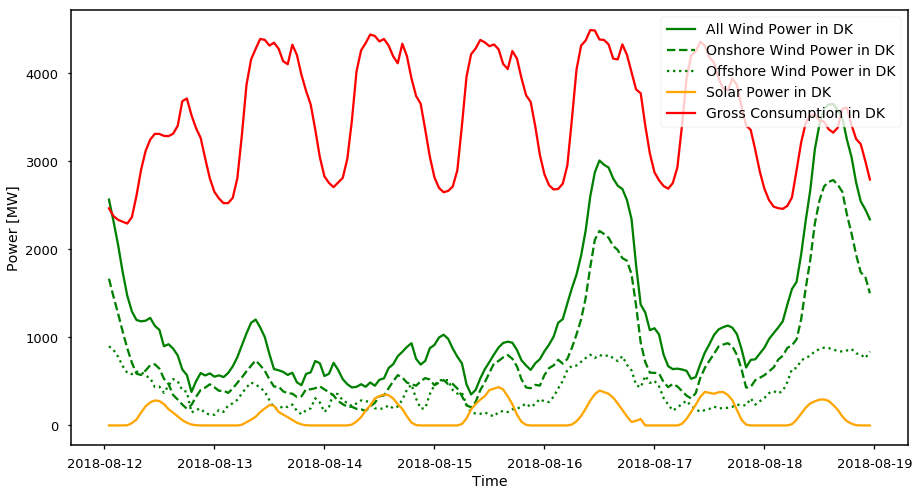

In [6]:
# Check raw data for a snapshot of the data
time_cut = [np.datetime64('2018-08-12'),np.datetime64('2018-08-19')]
power_cons_ob.PlotTimeSeries(\
    col_names=['TotalWindPower','OnshoreWindPower','OffshoreWindPower','SolarPower','GrossCon'],\
    colors=['g','g','g','orange','r'],ls=['-','--',':','-','-'],\
    legend=True,time_cut=time_cut,two_axes=False,fig_name='timeseries_raw_data',fig_format='png')

Calculating iFFT
Time step used for FFT: 3600.0 sec
------
Calculating iFFT
Time step used for FFT: 3600.0 sec


/home/karen/Projects/EPIMES/python/windpype_dev/windpype/power.py:1686: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if a.colors == 'rainbow':


------


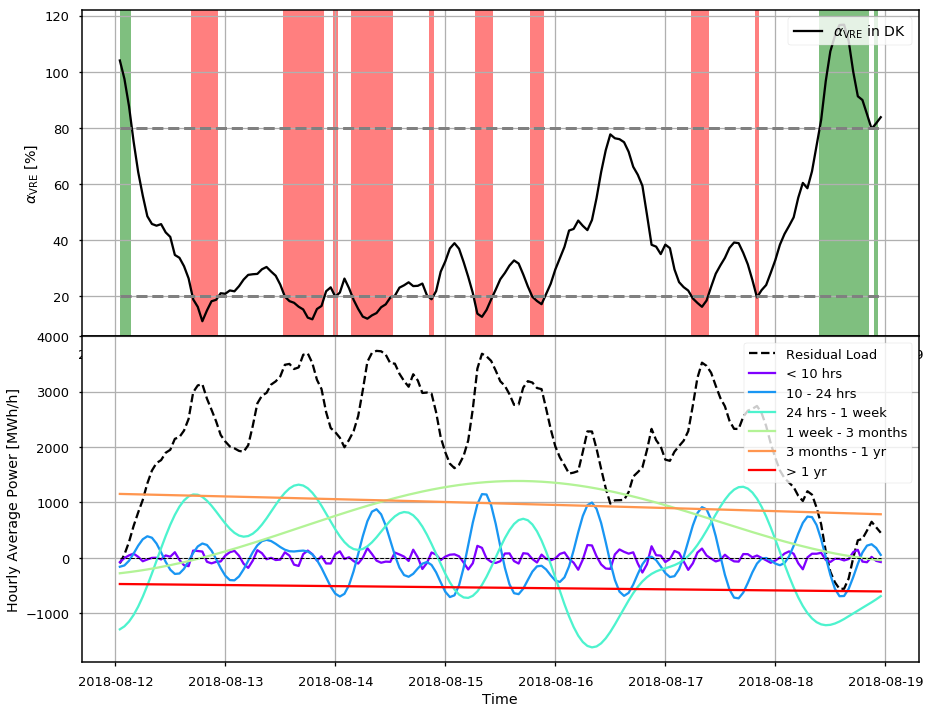

In [4]:
# Look at iFFT
time_cut = [np.datetime64('2018-08-12'),np.datetime64('2018-08-19')]
power_cons_ob.AddiFFT(power_name=trl+ext)
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(2,1,1)
power_cons_ob.PlotTimeSeries(col_names=['alpha_'+trp+ext],\
    colors=['k'],legend=True,time_cut=time_cut,two_axes=False,add=True)
ax1.set_ylabel(r'$\alpha_{\rm VRE}$ [%]')
ax1.grid()
power_cons_ob.HighlightPenetration(power_name=trp+ext,\
    colors=['g','r'],time_cut=time_cut,alpha=0.5,alpha_cuts=alpha_cuts) #
ax1 = fig.add_subplot(2,1,2)
power_cons_ob.PlotiFFT(power_name=trl+ext,new_y_axis=False,freq_cuts=freq_cuts,\
    time_cut=time_cut,legend=True,\
    colors=colors,labels=labels,add=True)
ax1.set_ylabel('Hourly Average Power [MWh/h]')
ax1.set_xlabel('Time')
plt.subplots_adjust(hspace=0)
plt.savefig('../../plots/timeseries.png',format='png',dpi=300)

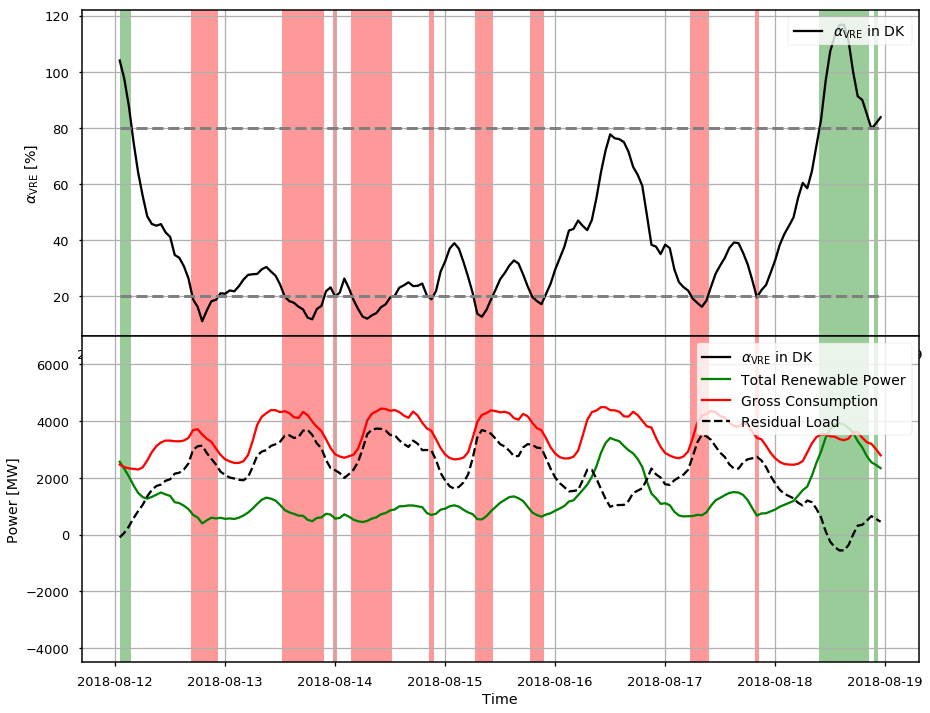

In [5]:
# Raw data during the same time period for VRE, cons and residual load
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(2,1,1)
power_cons_ob.PlotTimeSeries(col_names=['alpha_'+trp+ext],\
    colors=['k'],legend=True,time_cut=time_cut,two_axes=False,add=True)
ax1.set_ylabel(r'$\alpha_{\rm VRE}$ [%]')
ax1.grid()
power_cons_ob.HighlightPenetration(power_name='TotalRenPower'+ext,\
    colors=['g','r'],time_cut=time_cut,alpha=0.4,alpha_cuts=alpha_cuts)
ax1 = fig.add_subplot(2,1,2)
power_cons_ob.PlotTimeSeries(col_names=['TotalRenPower','GrossCon',trl],ylim=[-4500,7000],\
                            colors=['g','r','k'],ls=['-','-','--'],\
                            labels=['Total Renewable Power','Gross Consumption','Residual Load'],\
                            legend=True,time_cut=time_cut,\
                            fig_name='residual_load_data',add=True)
power_cons_ob.HighlightPenetration(power_name='TotalRenPower'+ext,\
    colors=['g','r'],time_cut=time_cut,alpha=0.4,alpha_cuts=False)
ax1 = plt.gca()
ax1.grid()
ax1.set_ylabel('Power [MW]')
ax1.set_xlabel('Time')
plt.subplots_adjust(hspace=0)
plt.savefig('../../plots/timeseries_VRE_and_cons.png',format='png',dpi=300)